In [11]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

c:\Python\Python3.9.2\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


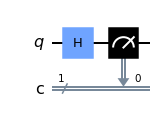

In [8]:
# Let's create a circuit to put a state in superposition and measure it

circ = QuantumCircuit(1,1) # We use one qubit and also one classical bit for the measure result 

circ.h(0) #We apply the H gate

circ.measure(range(1),range(1)) # We measure

circ.draw(output='mpl') #We draw the circuit

In [9]:
print(circ.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[1];
creg c[1];
h q[0];
measure q[0] -> c[0];



{'0': 511, '1': 513}


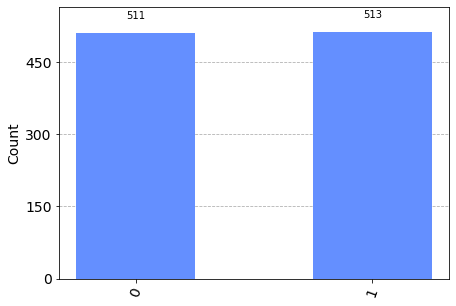

In [12]:

backend_sim = Aer.get_backend('qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

In [13]:
# Execution to the get the statevector

circ2 = QuantumCircuit(1,1)

circ2.h(0)

backend = Aer.get_backend('statevector_simulator') # We change the backend

job = execute(circ2, backend) # We execute the circuit with the new simulator. Now, we do not need repetitions

result = job.result() # We collect the results and access the stavector 
outputstate = result.get_statevector(circ2)
print(outputstate)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


In [14]:
backend = Aer.get_backend('unitary_simulator') # We change the backend again

job = execute(circ2, backend) # We execute the circuit

result = job.result() # We collect the results and obtain the matrix
unitary = result.get_unitary()
print(unitary)

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


### IBM Q Backend

In [19]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService(channel="ibm_quantum", token="0d9b680e6d7e2aa888e52f8d9bdd764ce01607231bbbd108a27d83c7336ebae2fd4d16c92a9f25e33b5a5b8a762e81e11a3ca6412a107e4052c8e5bb24574312")

In [20]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="0d9b680e6d7e2aa888e52f8d9bdd764ce01607231bbbd108a27d83c7336ebae2fd4d16c92a9f25e33b5a5b8a762e81e11a3ca6412a107e4052c8e5bb24574312", set_as_default=True)
 
# Load saved credentials
service = QiskitRuntimeService()

In [21]:
provider = IBMQ.load_account() # We load our account 
provider.backends() # We retrieve the backends to check their status

for b in provider.backends():
    print(b.status().to_dict())

{'backend_name': 'ibmq_qasm_simulator', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_statevector', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_mps', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_extended_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'simulator_stabilizer', 'backend_version': '0.1.547', 'operational': True, 'pending_jobs': 0, 'status_msg': 'active'}
{'backend_name': 'ibm_brisbane', 'backend_version': '1.1.16', 'operational': True, 'pending_jobs': 98, 'status_msg': 'internal'}
{'backend_name': 'ibm_kyoto', 'backend_version': '1.2.12', 'operational': True, 'pending_jobs': 18, 'status_msg': 'active'}
{'backend_name': 'ibm_osaka', 'backend_version': '1.0.7', 'operational

{'0': 496, '1': 528}


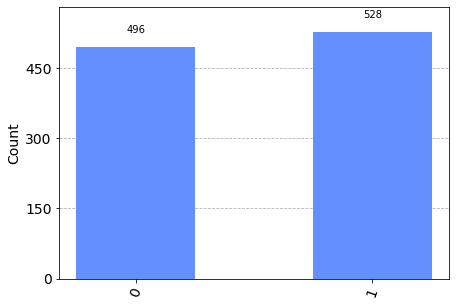

In [22]:
# Executing on the IBM Q Experience simulator

backend_sim = provider.get_backend('ibmq_qasm_simulator') # We choose the backend

job_sim = execute(circ, backend_sim, shots=1024) # We execute the circuit, selecting the number of repetitions or 'shots'

result_sim = job_sim.result() # We collect the results

counts = result_sim.get_counts(circ) # We obtain the frequency of each result and we show them 
print(counts) 
plot_histogram(counts)

In [24]:
# Executing on the quantum computer

backend = provider.get_backend('ibm_osaka')

job_exp = execute(circ, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


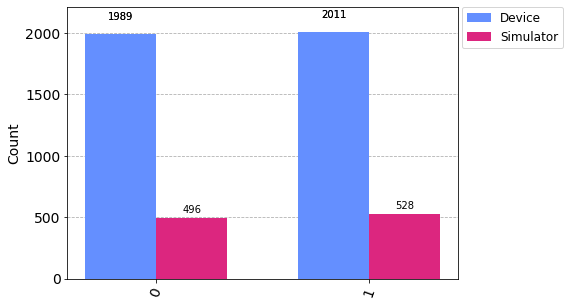

In [25]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])